This notebook contains the analysis of the simulation data, and also generates all graphs in the main text and supplementary materials of the paper titled 'Population viscosity promotes altruism under density-dependent dispersal', by Jasmeen Kanwal and Andy Gardner.

In [1]:
#Load libraries
import numpy as np
import random
import copy
import time
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import pylab
from os import listdir

In [2]:
#Parameter values for simulations
k = 100 #offspring per breeder
n_list = [1,2,3,5,10] #values of n (breeders per patch)
c_list_sim = [0, 0.2, 0.4, 0.6, 0.8] #values of c (cost of dispersal)
N_list = [int(50000/n) for n in n_list] #values of N (number of patches) - set so that all simulation runs have equal total breeder population, regardless of breeders per patch
n_to_N = dict(zip(n_list, N_list)) #zip n_list and N_list together into a dictionary

#Print out a list of n values and the corresponding total number of patches, to make up a population of 50,000 breeders
n_to_N 

{1: 50000, 2: 25000, 3: 16666, 5: 10000, 10: 5000}

In [3]:
#Read in simulation data files and split into 2 categories: 
#gen_files: average data by generation (for all 20,000 generations)
#disp_files: dispersal data by patch (only for last 1000 generations)

path = '' #specify data file directory here - leave blank if this notebook is saved in same directory as the data files

gen_files = []
disp_files = []
ind_files = []

for f in listdir(): #include path if this notebook is not in the same directory as the data files
    if f.endswith('.csv'):
        if f.endswith('disp.csv'):
            disp_files.append(f)
        else:
            gen_files.append(f)
            
#Split gen files into groups by n value
gen_files_1 = []
gen_files_2 = []
gen_files_3 = []
gen_files_5 = []
gen_files_10 = []
for f in gen_files:
    n_val = int(f.split('n_')[1].split('_c')[0])
    if n_val == 1:
        gen_files_1.append(f)
    if n_val == 2:
        gen_files_2.append(f)
    if n_val == 3:
        gen_files_3.append(f)
    if n_val == 5:
        gen_files_5.append(f)
    if n_val == 10:
        gen_files_10.append(f)
        
#Split disp files into groups by n value
disp_files_1 = []
disp_files_2 = []
disp_files_3 = []
disp_files_5 = []
disp_files_10 = []
for f in disp_files:
    n_val = int(f.split('n_')[1].split('_c')[0])
    if n_val == 1:
        disp_files_1.append(f)
    if n_val == 2:
        disp_files_2.append(f)
    if n_val == 3:
        disp_files_3.append(f)
    if n_val == 5:
        disp_files_5.append(f)
    if n_val == 10:
        disp_files_10.append(f)

## Generate main 4-panelled figure

In [4]:
#For each gen_file, average the population means and medians over the last 1000 generations
def get_avg(filename):
    gen_avgs = pd.read_csv(filename, header=None) 
    last_1000 = np.mean(gen_avgs[-1000:])
    return last_1000

gen_avgs_1 = [get_avg(f) for f in gen_files_1]
gen_avgs_2 = [get_avg(f) for f in gen_files_2]
gen_avgs_3 = [get_avg(f) for f in gen_files_3]
gen_avgs_5 = [get_avg(f) for f in gen_files_5]
gen_avgs_10 = [get_avg(f) for f in gen_files_10]

In [5]:
#convert the altruism trait value MEANS to A (potential for altruism)
A_list_1_mean = [x[5]/(1-x[5]) for x in gen_avgs_1]
A_list_2_mean = [x[5]/(1-x[5]) for x in gen_avgs_2]
A_list_3_mean = [x[5]/(1-x[5]) for x in gen_avgs_3]
A_list_5_mean = [x[5]/(1-x[5]) for x in gen_avgs_5]
A_list_10_mean = [x[5]/(1-x[5]) for x in gen_avgs_10]

In [6]:
#OR convert the altruism MEDIANS to A 
A_list_1 = [x[2]/(1-x[2]) for x in gen_avgs_1]
A_list_2 = [x[2]/(1-x[2]) for x in gen_avgs_2]
A_list_3 = [x[2]/(1-x[2]) for x in gen_avgs_3]
A_list_5 = [x[2]/(1-x[2]) for x in gen_avgs_5]
A_list_10 = [x[2]/(1-x[2]) for x in gen_avgs_10]

In [7]:
#Get x* (avg dispersal rate) of last 1000 generations from the disp_files of each simulation
def get_avg_disp(disp_filename):
    Disps = pd.read_csv(disp_filename, header=None)
    avg_d = np.mean(Disps[2]/Disps[1])
    return avg_d

avg_d_1 = [get_avg_disp(f) for f in disp_files_1]
avg_d_2 = [get_avg_disp(f) for f in disp_files_2]
avg_d_3 = [get_avg_disp(f) for f in disp_files_3]
avg_d_5 = [get_avg_disp(f) for f in disp_files_5]
avg_d_10 = [get_avg_disp(f) for f in disp_files_10]

In [8]:
#Functions for plotting analytical predictions
def get_x_star(n,c):
    x_star = 2/(1 + 2*c*n + np.sqrt(1+4*n*(n-1)*(c**2)))
    return(x_star)

def get_A(n,c):
    A = (2*n*(c**2)-1-np.sqrt(1+4*n*(n-1)*(c**2)))/(2*n*(c**2-1))
    return(A)

In [9]:
#Set plot style
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))

#0072B2
#009E73
#D55E00
#CC79A7
#F0E442
#56B4E9


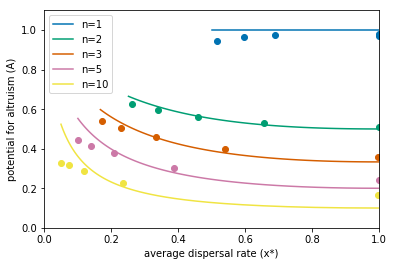

In [10]:
#Plot simulation data alongside analytical predictions using altruism trait value MEANS

c_list = np.linspace(0,1,100, endpoint=False)

#plot analytical predictions
plt.plot([get_x_star(1,c) for c in c_list], [get_A(1,c) for c in c_list], '-', label='n=1')
plt.plot([get_x_star(2,c) for c in c_list], [get_A(2,c) for c in c_list], '-', label='n=2')
plt.plot([get_x_star(3,c) for c in c_list], [get_A(3,c) for c in c_list], '-', label='n=3')
plt.plot([get_x_star(5,c) for c in c_list], [get_A(5,c) for c in c_list], '-', label='n=5')
plt.plot([get_x_star(10,c) for c in c_list], [get_A(10,c) for c in c_list], '-', label='n=10')

#plot simulation data points
plt.plot(avg_d_1, A_list_1_mean, 'o', color = '#0072B2')
plt.plot(avg_d_2, A_list_2_mean, 'o', color = '#009E73')
plt.plot(avg_d_3, A_list_3_mean, 'o', color = '#D55E00')
plt.plot(avg_d_5, A_list_5_mean, 'o', color = '#CC79A7')
plt.plot(avg_d_10, A_list_10_mean, 'o', color = '#F0E442')

plt.ylim(0,1.1)
plt.xlim(0,1)
plt.xlabel('average dispersal rate (x*)')
plt.ylabel('potential for altruism (A)')
plt.legend()

plt.show()

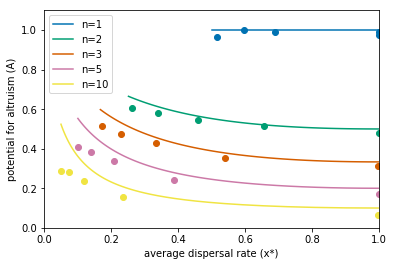

In [11]:
#Plot simulation data alongside analytical predictions using altruism trait value MEDIANS

c_list = np.linspace(0,1,100, endpoint=False)

#plot analytical predictions
plt.plot([get_x_star(1,c) for c in c_list], [get_A(1,c) for c in c_list], '-', label='n=1')
plt.plot([get_x_star(2,c) for c in c_list], [get_A(2,c) for c in c_list], '-', label='n=2')
plt.plot([get_x_star(3,c) for c in c_list], [get_A(3,c) for c in c_list], '-', label='n=3')
plt.plot([get_x_star(5,c) for c in c_list], [get_A(5,c) for c in c_list], '-', label='n=5')
plt.plot([get_x_star(10,c) for c in c_list], [get_A(10,c) for c in c_list], '-', label='n=10')

#plot simulation data points
plt.plot(avg_d_1, A_list_1, 'o', color = '#0072B2')
plt.plot(avg_d_2, A_list_2, 'o', color = '#009E73')
plt.plot(avg_d_3, A_list_3, 'o', color = '#D55E00')
plt.plot(avg_d_5, A_list_5, 'o', color = '#CC79A7')
plt.plot(avg_d_10, A_list_10, 'o', color = '#F0E442')

plt.ylim(0,1.1)
plt.xlim(0,1)
plt.xlabel('average dispersal rate (x*)')
plt.ylabel('potential for altruism (A)')
plt.legend()

plt.show()

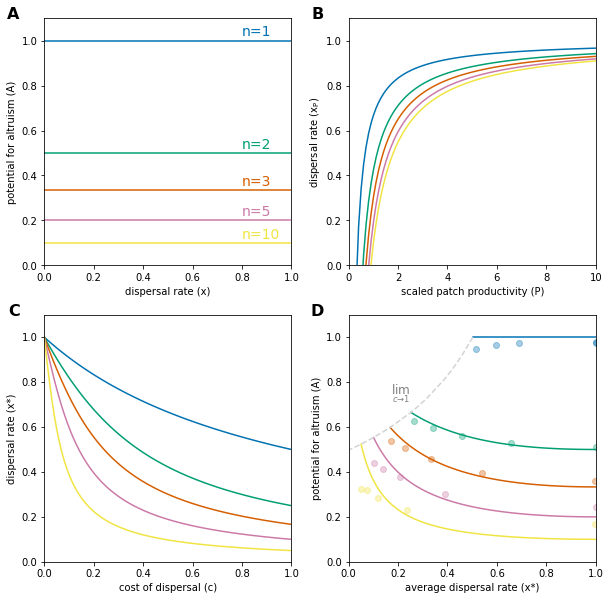

In [15]:
##GENERATE 4-PANELLED FIGURE

pylab.rcParams['figure.figsize'] = (10, 10)

fig = plt.figure()

#Panel 1: Density-independent dispersal model (version of Taylor 92 generalised for non-zero c)
ax1 = fig.add_subplot(2,2,1)
xpoints = np.linspace(0,1,5)
ax1.plot(xpoints, [1]*5, '-', label='n=1')
ax1.plot(xpoints, [1/2]*5, '-', label='n=2')
ax1.plot(xpoints, [1/3]*5, '-', label='n=3')
ax1.plot(xpoints, [1/5]*5, '-', label='n=5')
ax1.plot(xpoints, [1/10]*5, '-', label='n=10')
ax1.set_ylim(0,1.1)
ax1.set_xlim(0,1)
ax1.set_xlabel('dispersal rate (x)')
ax1.set_ylabel('potential for altruism (A)')
ax1.text(-0.1, 1.15, 'A', fontsize=16, fontweight='bold', va='top', ha='right')
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
ax1.text(0.8, 1+0.02, 'n=1', fontsize=14, color='#0072B2')
ax1.text(0.8, (1/2)+0.02, 'n=2', fontsize=14, color='#009E73')
ax1.text(0.8, (1/3)+0.02, 'n=3', fontsize=14, color='#D55E00')
ax1.text(0.8, (1/5)+0.02, 'n=5', fontsize=14, color='#CC79A7')
ax1.text(0.8, (1/10)+0.02, 'n=10', fontsize=14, color='#F0E442')

#Panel 2: Density-dependent dispersal rate as a function of patch density P
ax2 = fig.add_subplot(2,2,2)
xpoints_ct = np.linspace(0.1,10.1,100)
def x_crespi(c,n,P):
    x = 1 - (1/P)*(1 - 2/( 1 + 2*c*n + np.sqrt(1 + 4*n*(c**2)*(n-1)) ) )
    return x
ax2.plot(xpoints_ct, [x_crespi(0.5,1,P) for P in xpoints_ct], '-') #, label='n=1')
ax2.plot(xpoints_ct, [x_crespi(0.5,2,P) for P in xpoints_ct], '-') #, label='n=2')
ax2.plot(xpoints_ct, [x_crespi(0.5,3,P) for P in xpoints_ct], '-') #, label='n=3')
ax2.plot(xpoints_ct, [x_crespi(0.5,5,P) for P in xpoints_ct], '-') #, label='n=5')
ax2.plot(xpoints_ct, [x_crespi(0.5,10,P) for P in xpoints_ct], '-') #, label='n=10')
ax2.set_ylim(0,1.1)
ax2.set_xlim(0,10)
ax2.set_xlabel('scaled patch productivity (P)')
ax2.set_ylabel('dispersal rate ($\mathregular{x_P}$)')
ax2.text(-1, 1.15, 'B', fontsize=16, fontweight='bold', va='top', ha='right')
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

#Panel 3: Optimal average dispersal rate as a function of c (originally derived by Motro/Frank)
ax3 = fig.add_subplot(2,2,3)
xpoints_m = np.linspace(0,1,100)
def x_motro(c,n):
    x = 2/( 1 + 2*c*n + np.sqrt(1 + 4*n*(c**2)*(n-1)) )
    return x
ax3.plot(xpoints_m, [x_motro(c,1) for c in xpoints_m], '-') #, label='n=1')
ax3.plot(xpoints_m, [x_motro(c,2) for c in xpoints_m], '-') #, label='n=2')
ax3.plot(xpoints_m, [x_motro(c,3) for c in xpoints_m], '-') #, label='n=3')
ax3.plot(xpoints_m, [x_motro(c,5) for c in xpoints_m], '-') #, label='n=5')
ax3.plot(xpoints_m, [x_motro(c,10) for c in xpoints_m], '-') #, label='n=10')
ax3.set_ylim(0,1.1)
ax3.set_xlim(0,1)
ax3.set_xlabel('cost of dispersal (c)')
ax3.set_ylabel('dispersal rate (x*)')
ax3.text(-0.1, 1.15, 'C', fontsize=16, fontweight='bold', va='top', ha='right')
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')

#Panel 4: Our model
ax4 = fig.add_subplot(2,2,4)
c_list = np.linspace(0,1,100, endpoint=False)
#plot analytical predictions
ax4.plot([get_x_star(1,c) for c in c_list], [get_A(1,c) for c in c_list], '-') #, label='n=1')
ax4.plot([get_x_star(2,c) for c in c_list], [get_A(2,c) for c in c_list], '-') #, label='n=2')
ax4.plot([get_x_star(3,c) for c in c_list], [get_A(3,c) for c in c_list], '-') #, label='n=3')
ax4.plot([get_x_star(5,c) for c in c_list], [get_A(5,c) for c in c_list], '-') #, label='n=5')
ax4.plot([get_x_star(10,c) for c in c_list], [get_A(10,c) for c in c_list], '-') #, label='n=10')
#plot actual simulation data points with actual avg dispersal
ax4.plot(avg_d_1, A_list_1_mean, 'o', color = '#0072B2', alpha = 0.35)
ax4.plot(avg_d_2, A_list_2_mean, 'o', color = '#009E73', alpha = 0.35)
ax4.plot(avg_d_3, A_list_3_mean, 'o', color = '#D55E00', alpha = 0.35)
ax4.plot(avg_d_5, A_list_5_mean, 'o', color = '#CC79A7', alpha = 0.35)
ax4.plot(avg_d_10, A_list_10_mean, 'o', color = '#F0E442', alpha = 0.35)
ax4.set_ylim(0,1.1)
ax4.set_xlim(0,1)
ax4.set_xlabel('average dispersal rate (x*)')
ax4.set_ylabel('potential for altruism (A)')
ax4.text(-0.1, 1.15, 'D', fontsize=16, fontweight='bold', va='top', ha='right')
ax4.plot([get_x_star(n,max(c_list)) for n in [1,1.1,1.2,1.3,1.6,1.8,2,3,5,10,50,100]], [get_A(n,max(c_list)) for n in [1,1.1,1.2,1.3,1.6,1.8,2,3,5,10,50,100]], '--', color = 'lightgrey')
ax4.text(0.25, 0.8, r'$\lim_{c \to 1}$', fontsize=12, va='top', ha='right', color='grey')
ax4.set_aspect(1.0/ax4.get_data_ratio(), adjustable='box')

#plt.savefig('4-panel-lim.svg', bbox_inches='tight')
plt.savefig('4-panel-lim.pdf', bbox_inches='tight')

plt.show()

## Illustrative example of simulation data analysis

In [16]:
#get relevant data files for illustrative example (n=3, c=0.4)
gen_file = 'n_3_c_0.4_2021-03-18-17.35.csv'
disp_file = 'n_3_c_0.4_2021-03-18-17.35_disp.csv'

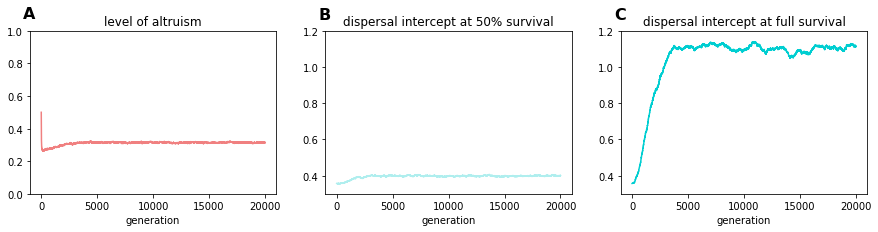

In [17]:
#Look at the evolution of means across all generations
pylab.rcParams['figure.figsize'] = (15, 3)

gen_dat = pd.read_csv(gen_file, header=None) 

fig = plt.figure()

#Panel 1: altruism
ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(len(gen_dat)), gen_dat[5], '-', color = 'lightcoral')
ax1.set_title('level of altruism')
ax1.set_xlabel('generation')
ax1.set_ylim(0,1)
ax1.text(-500, 1.15, 'A', fontsize=16, fontweight='bold', va='top', ha='right')
#ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')

#Panel 2: disp 1
ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(len(gen_dat)), gen_dat[3], '-', color = 'paleturquoise')
ax2.set_title('dispersal intercept at 50% survival')
ax2.set_xlabel('generation')
ax2.set_ylim(0.3,1.2)
ax2.text(-500, 1.33, 'B', fontsize=16, fontweight='bold', va='top', ha='right')
#ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

#Panel 3: disp 2
ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(len(gen_dat)), gen_dat[4], '-', color = 'darkturquoise')
ax3.set_title('dispersal intercept at full survival')
ax3.set_xlabel('generation')
ax3.set_ylim(0.3,1.2)
ax3.text(-500, 1.33, 'C', fontsize=16, fontweight='bold', va='top', ha='right')
#ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')

fig.savefig("illust_evol.pdf", bbox_inches='tight')

In [18]:
#Look at the dispersal function and actual dispersal rates in more detail

#First calculate analytical prediction curve
c = 0.4
n = 3
Motro = 2/(1 + 2*c*n + np.sqrt(1+4*n*(n-1)*(c**2)))
pred_A =  -(1 - 2*n*(c**2) + np.sqrt(1 + 4*n*(n-1)*(c**2))) / (2*n*((c**2)-1))
pred_x_star = pred_A/(1+pred_A)
avg_S = (0.5 + 0.5*(1-pred_x_star)*pred_x_star)*(.75)

In [19]:
#Then calculate linear function from average inercepts in final generation
int_1 = float(gen_dat[3][-1:])
int_2 = float(gen_dat[4][-1:])

In [20]:
#Then get actual dispersal data for final generation, from the disp_file
num_lines = sum([1 for line in open(disp_file)])
N = n_to_N[3]
disp_last = pd.read_csv(disp_file, header=None, skiprows=int(num_lines-N))

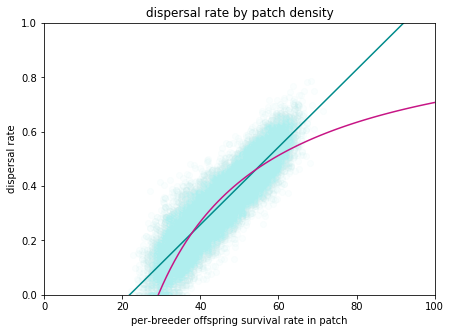

In [21]:
#Generate plot with all 3 of these layers 
pylab.rcParams['figure.figsize'] = (7, 5)

#plot actual data points per patch in final generation
plt.plot(disp_last[1]/n, disp_last[2]/disp_last[1], 'o', color = 'paleturquoise', alpha = 0.05)
plt.title('dispersal rate by patch density')
plt.xlabel('per-breeder offspring survival rate in patch')
plt.ylabel('dispersal rate')
plt.ylim(0,1)
plt.xlim(0,100)

#plot linear function from intercepts
x1 = np.linspace(0,100,100)
y1 = ((x1-0.5*k)*(int_2 - int_1)/(0.5*k)) + int_1
plt.plot(x1, y1, '-', color = 'darkcyan')

#plot analytical curve
x2 = np.linspace(0.1,k,100)
y2 = 1-((1-Motro)/(x2/(avg_S*k)))
plt.plot(x2, y2, '-', color = 'mediumvioletred')

plt.savefig("illust_disp.pdf", bbox_inches='tight')

plt.show()

## Statistical analysis of simulation data

In [22]:
#Put the 20 data points where n>1 together in a data frame with columns: d, A, n
d_list = avg_d_2 + avg_d_3 + avg_d_5 + avg_d_10
A_list = A_list_2_mean + A_list_3_mean + A_list_5_mean + A_list_10_mean
n_list = [2]*5 + [3]*5 + [5]*5 + [10]*5
dict = {'d': d_list, 'A': A_list, 'n': n_list}  
df = pd.DataFrame(dict)
df

,d,A,n
0,0.999729,0.509546,2
1,0.656887,0.529891,2
2,0.460188,0.562186,2
3,0.341015,0.597370,2
4,0.263353,0.625637,2
5,0.998099,0.357799,3
6,0.540481,0.396707,3
7,0.333063,0.457370,3
8,0.229324,0.504762,3
9,0.171940,0.538721,3


In [23]:
#Fit a mixed effects linear regression model with random intercept for n
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = smf.mixedlm('A ~ d', df, groups=df['n'])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: A      
No. Observations: 20      Method:             REML   
No. Groups:       4       Scale:              0.0009 
Min. group size:  5       Likelihood:         28.9108
Max. group size:  5       Converged:          Yes    
Mean group size:  5.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.483    0.074  6.499 0.000  0.338  0.629
d          -0.178    0.021 -8.560 0.000 -0.219 -0.137
Group Var   0.022    0.667                           



In [24]:
#Set up the Monte Carlo Permutation Test

#Function to permute the A values amongst the x* values, holding n fixed
A_list_all = [A_list_2, A_list_3, A_list_5, A_list_10]

def permute(A_list_all, d_list, n_list):
    shuffled_A_list = []
    for item in A_list_all:
        list_copy = item[:]
        random.shuffle(list_copy)
        shuffled_A_list += list_copy
    df_dict = {'d': d_list, 'n': n_list, 'A': shuffled_A_list}  
    shuffled_df = pd.DataFrame(df_dict)
    return shuffled_df

#Function that outputs the mixed effects regression model for each permutation
def get_model(shuffled_df):
    #fit mixed effects model with random intercept for n
    md = smf.mixedlm('A ~ d', shuffled_df, groups=df['n'])
    mdf = md.fit()
    return mdf

#Function that just outputs the mixed effects regression coefficient for each permutation
def get_coef(shuffled_df):
    #fit mixed effects model with random intercept for n
    md = smf.mixedlm('A ~ d', shuffled_df, groups=df['n'])
    mdf = md.fit()
    coef = mdf.params[1]
    return coef

#Define ab-line function to plot regression lines
def abline(slope, intercept, col):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = col)

#plot model-fitted regression lines for a given permutation
def plot_model(df, filename):
    model = get_model(df)
    #plot the shuffled points
    plt.plot(avg_d_2, df['A'][0:5], 'o', color = '#009E73')
    plt.plot(avg_d_3, df['A'][5:10], 'o', color = '#D55E00')
    plt.plot(avg_d_5, df['A'][10:15], 'o', color = '#CC79A7')
    plt.plot(avg_d_10, df['A'][15:20], 'o', color = '#F0E442')
    plt.xlabel('average dispersal rate (x*)')
    plt.ylabel('potential for altruism (A)')
    plt.ylim(0,1)
    plt.xlim(0,1)
    #plot the fitted regression lines
    coef = model.params[1]
    intercept = model.params[0]
    RE = model.random_effects
    abline(coef, intercept + float(RE[2]), '#009E73')
    abline(coef, intercept + float(RE[3]), '#D55E00')
    abline(coef, intercept + float(RE[5]), '#CC79A7')
    abline(coef, intercept + float(RE[10]), '#F0E442')
    plt.title('coef: ' + str(coef))
    plt.savefig(filename + '.pdf', bbox_inches='tight')

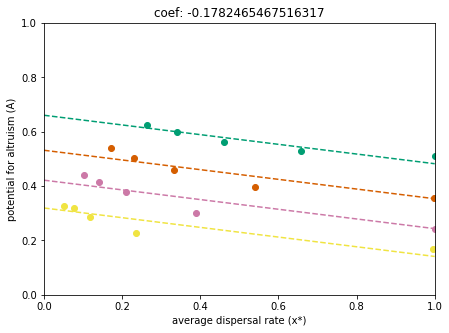

In [25]:
#Plot the regression lines for the actual data
plot_model(df, 'regr_actual')

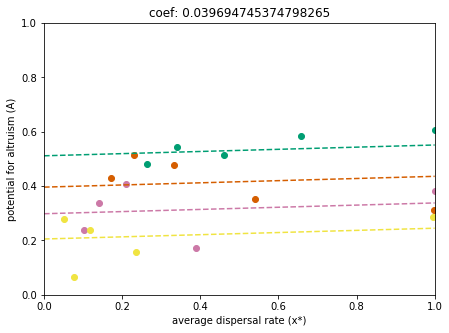

In [26]:
#Plot the regression lines for a random permutation
plot_model(permute(A_list_all, d_list, n_list), 'regr_permuted')

In [27]:
#Permute the data P times
P=100000
coef_list = []

start_time = time.time()

for i in range(P):
    result = get_coef(permute(A_list_all, d_list, n_list))
    coef_list.append(result)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2071.8786385059357 seconds ---


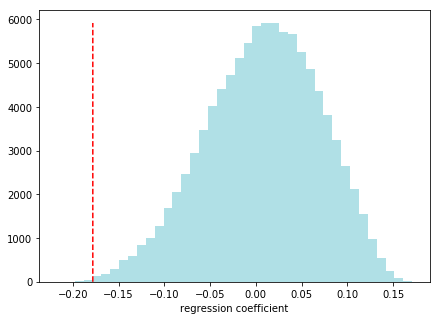

In [30]:
#Plot the results as a histogram, alongside the coefficient of the actual data
histogram = plt.hist(coef_list, bins=40, density=False, color='powderblue')
max_freq = int(max(histogram[0]))
plt.plot([get_coef(df)]*max_freq, range(0,max_freq), '--', color='red')
plt.xlabel('regression coefficient')
plt.savefig('hist.pdf', bbox_inches='tight')

In [31]:
#A p-value can be calculated using: p=r+1/n+1

#Function to find the number of items in a list that are greater than or equal to the test statistic (to calculate p-value)
def calc_p(x,coef_list):
    count = 0
    for item in coef_list:
        if item <= x:
            count+=1
    p = (count+1)/(len(coef_list)+1)
    return p

p_val = calc_p(get_coef(df),coef_list)
p_val

0.0007399926000739993